In [1]:
from sklearn.svm import SVC # "Support vector classifier"

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

import pandas as pd

import itertools

import os

dir_base = '/home/guarracino/Downloads/Pangenomics/HG002_bakeoff'

Find principal component pairs with a good enough separation line between `maternal` and `paternal` haplotypes:

In [2]:
N_to_best_pair_and_info_dict = {}

for N in ['All', 'XY'] + list(range(1, 23)):
    print(N)
    HG002_df = pd.read_csv(
        os.path.join(dir_base, f'CMS.LongAlignments.NoUtgs.NoAltExceptPeregrine.chr{N}.PCA.tsv'),
        sep = '\t',
        index_col=0
    )

    #HG002_df = HG002_df.replace('maternal', '#FF0000')
    #HG002_df = HG002_df.replace('paternal', '#00FF00')

    pair_and_info_list = []

    for i, j in itertools.combinations(range(0, HG002_df.shape[0]), 2):
        X = HG002_df.iloc[:, [i, j]].values
        y = HG002_df.Haplotype.values
        
        clf = SVC(kernel='linear', C=1.0).fit(X, y)
        
        score = clf.score(X, y)
        print('\t', i, j, score)
        
        w = clf.coef_[0]
        slope = -w[0] / w[1]
        intercept = -clf.intercept_[0] / w[1]
        
        pair_and_info_list.append([(i, j), score, slope, intercept])
        
        if score == 1:
            break

    pair_and_info_list = sorted(pair_and_info_list, key=lambda x: x[1], reverse=True)
    
    N_to_best_pair_and_info_dict[N] = pair_and_info_list[0]

All
	 0 1 1.0
XY
	 0 1 1.0
1
	 0 1 0.7857142857142857
	 0 2 0.42857142857142855
	 0 3 0.7142857142857143
	 0 4 1.0
2
	 0 1 0.7142857142857143
	 0 2 0.5
	 0 3 0.5714285714285714
	 0 4 1.0
3
	 0 1 1.0
4
	 0 1 1.0
5
	 0 1 1.0
6
	 0 1 1.0
7
	 0 1 1.0
8
	 0 1 0.5
	 0 2 1.0
9
	 0 1 0.5
	 0 2 0.5
	 0 3 0.7142857142857143
	 0 4 0.7857142857142857
	 0 5 1.0
10
	 0 1 1.0
11
	 0 1 1.0
12
	 0 1 1.0
13
	 0 1 1.0
14
	 0 1 1.0
15
	 0 1 0.8571428571428571
	 0 2 1.0
16
	 0 1 0.5
	 0 2 0.6428571428571429
	 0 3 0.8571428571428571
	 0 4 0.5714285714285714
	 0 5 0.8571428571428571
	 0 6 0.8571428571428571
	 0 7 0.9285714285714286
	 0 8 0.8571428571428571
	 0 9 0.5714285714285714
	 0 10 0.6428571428571429
	 0 11 0.5
	 0 12 0.5714285714285714
	 0 13 0.5
	 1 2 0.7142857142857143
	 1 3 1.0
17
	 0 1 0.5
	 0 2 0.6428571428571429
	 0 3 0.5
	 0 4 0.5714285714285714
	 0 5 0.5
	 0 6 1.0
18
	 0 1 0.5714285714285714
	 0 2 0.7142857142857143
	 0 3 1.0
19
	 0 1 1.0
20
	 0 1 0.8571428571428571
	 0 2 1.0
21
	 0 1 0.928571

In [3]:
N_to_best_pair_and_info_dict

{'All': [(0, 1), 1.0, 5.254739735089053, 5737.975350946006],
 'XY': [(0, 1), 1.0, 2.0927890510848672, -2727.219076310824],
 1: [(0, 4), 1.0, -0.36438726860322235, -78.59442065331429],
 2: [(0, 4), 1.0, 0.42520491471733257, -250.7314339650193],
 3: [(0, 1), 1.0, -0.012592366095214132, 121.17797770441743],
 4: [(0, 1), 1.0, -0.18163616763476212, -14.596568153460494],
 5: [(0, 1), 1.0, -0.13070545738331746, -106.94886474130205],
 6: [(0, 1), 1.0, 0.2980683498996936, -156.910106672221],
 7: [(0, 1), 1.0, 0.18858642750359508, -168.9272003419269],
 8: [(0, 2), 1.0, 0.08479691332143245, 29.852148112401135],
 9: [(0, 5), 1.0, 0.07996695815196873, -90.70304406979245],
 10: [(0, 1), 1.0, 0.18023549525086352, 22.407667095166502],
 11: [(0, 1), 1.0, 0.03952644986706539, -98.88438274861944],
 12: [(0, 1), 1.0, 1.4237372081286046, 109.55150119159973],
 13: [(0, 1), 1.0, -0.5927446157108985, -196.03542199592027],
 14: [(0, 1), 1.0, 0.7584107061820465, -56.480255461529126],
 15: [(0, 2), 1.0, 0.234748

Write the results:

In [4]:
import os
base_dir = '/home/guarracino/Downloads/Pangenomics/HG002_bakeoff'
with open(os.path.join(base_dir, 'BestPairsMatPatSeparationInPCA.tsv'), 'w') as fw:
    fw.write('\t'.join(['N', 'PCx', 'PCy', 'slope', 'intercept']) + '\n')
    
    for N, ((PCx, PCy), score, slope, intercept) in N_to_best_pair_and_info_dict.items():
        # PC + 1 because in R array indexes start from 1
        fw.write('\t'.join([str(N), str(PCx + 1), str(PCy + 1), str(slope), str(intercept)]) + '\n')

Debugging: plot the last (or one of the) solutions:

	 0 8 1.0


Text(0.5, 1.0, 'No Utgs and No alt except Peregrine - chr 22')

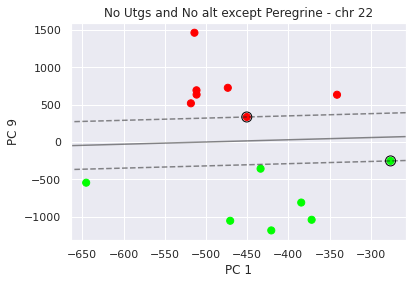

In [5]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=100, linewidth=1, facecolors='none',edgecolors='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


N = '22'
i, j = 0, 8
    
HG002_df = pd.read_csv(
    f'/home/guarracino/Downloads/Pangenomics/HG002_bakeoff/CMS.LongAlignments.NoUtgs.NoAltExceptPeregrine.chr{N}.PCA.tsv',
    sep = '\t',
    index_col=0
)
HG002_df = HG002_df.replace('maternal', '#FF0000')
HG002_df = HG002_df.replace('paternal', '#00FF00')

X = HG002_df.iloc[:, [i, j]].values
y = HG002_df.Haplotype.values

clf = SVC(kernel='linear', C=5).fit(X, y)
score = clf.score(X, y)
print('\t', i, j, score)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf);
plt.xlabel(f"PC {i+1}");
plt.ylabel(f"PC {j+1}");
plt.title(f'No Utgs and No alt except Peregrine - chr {N}')